In [18]:
filename = 'random_1'
path = "../blossom/hpc/outputs/"

In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colormaps
from matplotlib.animation import FuncAnimation
from functools import partial

hms = True
vid = False
pdfs = False

x_max = 400
y_max = 400
z_max = 1

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use("seaborn-v0_8-whitegrid")

def rand_jitter(arr):
    if(len(arr)):
        stdev = .001 * (max(arr) - min(arr))
        return arr + np.random.randn(len(arr)) * stdev
    return arr


df = pd.read_csv(path + filename + ".csv")
n = len(df["type"].unique())
colors = colormaps['tab10'].colors

counts_per_type = df.value_counts(['type', 'tick'])

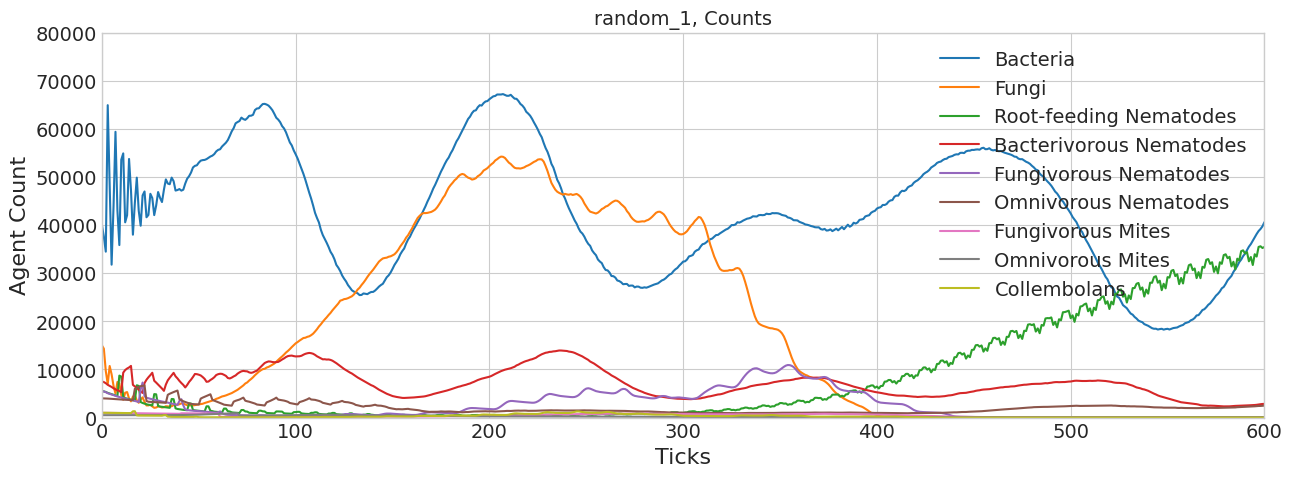

In [23]:
organism_group_labels = ["Bacteria", "Fungi", "Root-feeding Nematodes", "Bacterivorous Nematodes", "Fungivorous Nematodes", "Omnivorous Nematodes", "Fungivorous Mites", "Omnivorous Mites", "Collembolans"]
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()

for i in df['type'].unique():
    plt.plot(
        range(len(df["tick"].unique())),
        counts_per_type[i].reindex(range(len(df['tick'].unique())), fill_value=0).sort_index().to_list(),
        label=organism_group_labels[i],
        color=colors[i]
    )
ax.set_xlim(0, df["tick"].max())
ax.set_ylim(0, 80000)
ax.set_xlabel("Ticks")
ax.set_ylabel("Agent Count")
ax.set_title(f'{filename}, Counts')

plt.legend()
if pdfs:
    plt.savefig("./agent_counts_viz/" + filename + ".pdf", format="pdf", bbox_inches="tight")
plt.show()

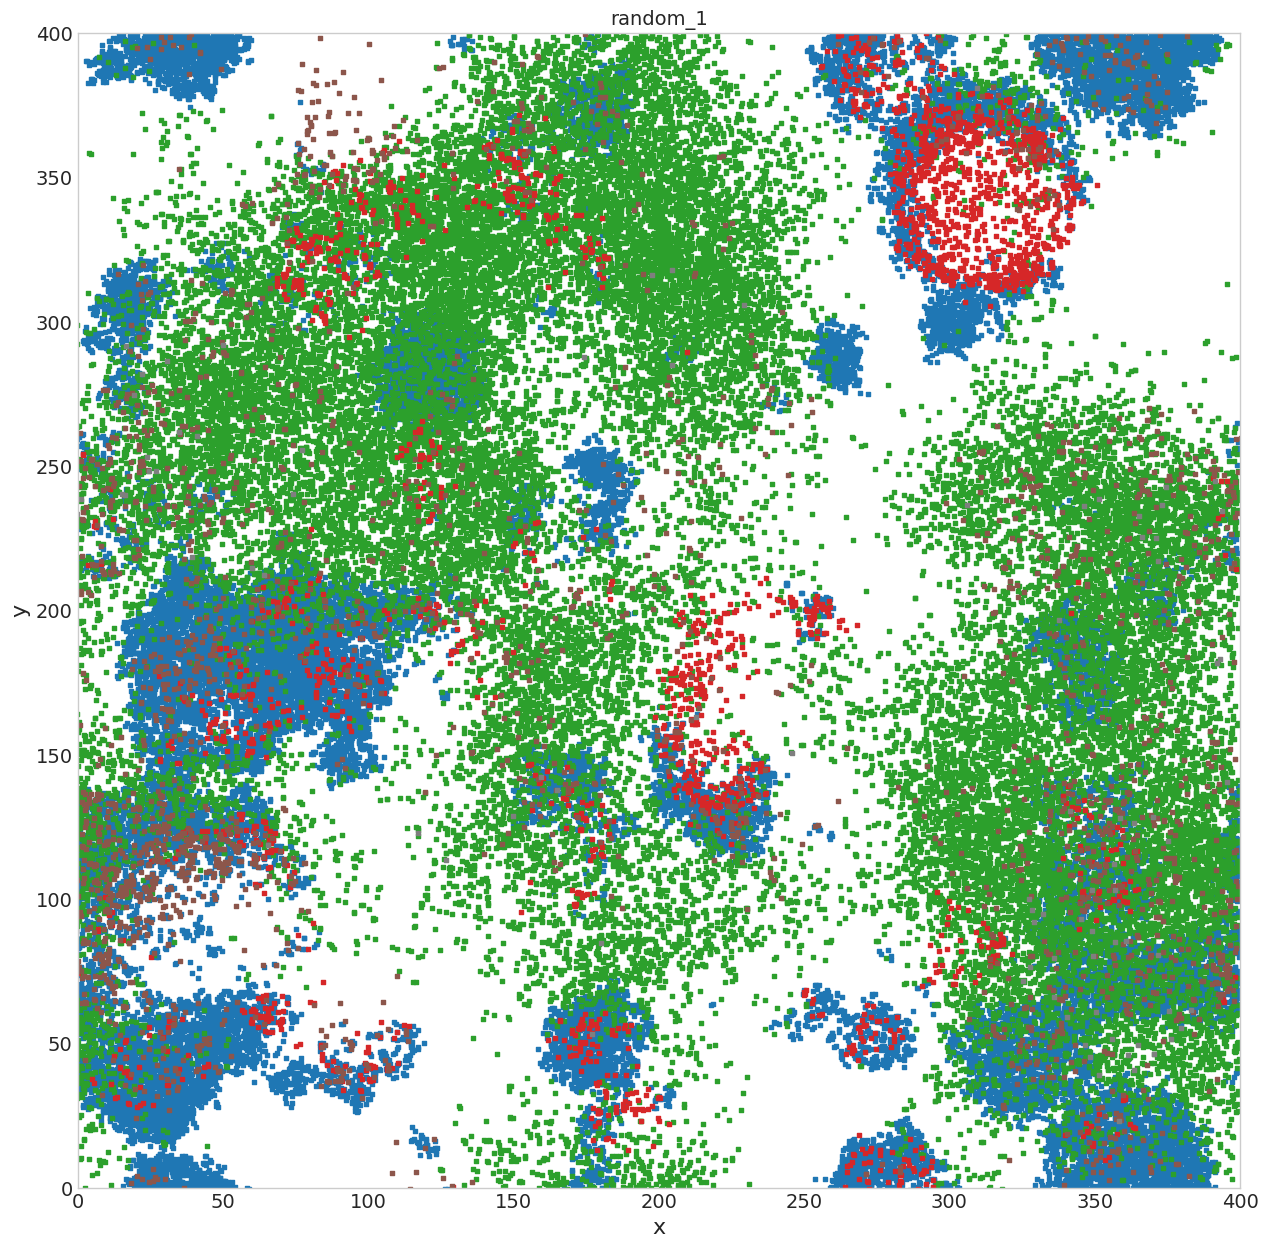

In [21]:
def update(t, ax):
    df1 = df[df["tick"] == t]
    ax.cla()
    for t in np.unique(df1["type"]):
        subset_type = df1[df1['type'] == t]
        if(len(subset_type['x']) != 0):
            ax.scatter(rand_jitter(subset_type['x']), rand_jitter(subset_type['y']), color=colors[t], label=t, s=10, marker='s')
    ax.set_title(f'{filename}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, x_max)
    ax.set_ylim(0, y_max)
    ax.grid(False)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot()
ani = FuncAnimation(fig, partial(update, ax=ax), frames=df["tick"].max(), interval=100)
ani.save("vids/" + filename + ".mp4")
plt.show()

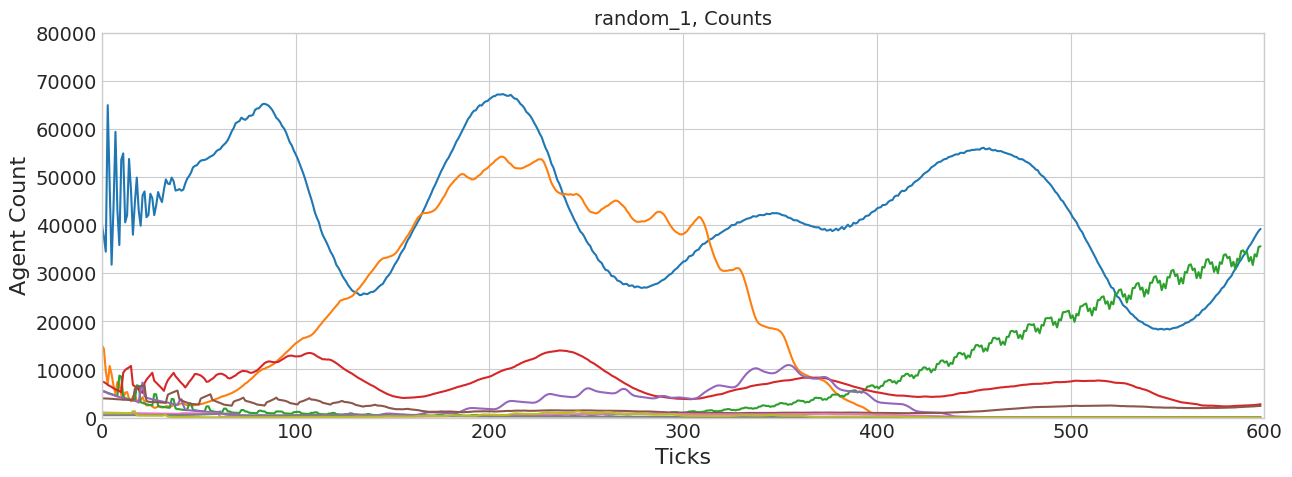

In [24]:
organism_group_labels = ["Bacteria", "Fungi", "Root-feeding Nematodes", "Bacterivorous Nematodes", "Fungivorous Nematodes", "Omnivorous Nematodes", "Fungivorous Mites", "Omnivorous Mites", "Collembolans"]

fill = [np.nan] * len(df["tick"].unique())

def update(t, ax):
    ax.cla()
    for i in df['type'].unique():
        sublist = counts_per_type[i].reindex(range(len(df['tick'].unique())), fill_value=0).sort_index().to_list()[:t]
        ax.plot(
            range(len(df["tick"].unique())),
            sublist + fill[len(sublist):],
            label=organism_group_labels[i],
            color=colors[i]
        )
    ax.set_xlim(0, df["tick"].max())
    ax.set_ylim(0, 80000)
    ax.set_xlabel("Ticks")
    ax.set_ylabel("Agent Count")
    ax.set_title(f'{filename}, Counts')

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()
ani = FuncAnimation(fig, partial(update, ax=ax), frames=df["tick"].max(), interval=100)
ani.save("vids/" + filename + "_test.mp4")
plt.show()